In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
filepath = '/content/timeseriesdata.csv'
df = pd.read_csv(filepath)
df

,Quarter,hdbrpi,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,1990 1Q,24.3,74.7,"16,669.50","2,647,627",61.907,1.8843,16.113111,31600,1458.400000
1,1990 2Q,24.4,70.5,"17,087.70","2,677,041",62.501,1.8396,16.999927,31600,1527.000000
2,1990 3Q,25.0,73.8,"17,930.10","2,706,454",63.181,1.7632,17.886744,31600,1098.700000
3,1990 4Q,24.7,84.9,"18,805","2,735,868",63.969,1.7445,18.773560,31600,1154.800000
4,1991 1Q,24.9,80.5,"18,521","2,750,577",64.249,1.7931,19.660376,31600,1490.800000
...,...,...,...,...,...,...,...,...,...,...
91,2012 4Q,146.7,98.3,"94,848.80","3,818,205",97.936,1.2221,113.643019,63500,3167.080078
92,2013 1Q,148.6,101.0,"93,773","3,824,842",98.574,1.2436,114.828898,65700,3308.100098
93,2013 2Q,149.4,88.5,"95,587.20","3,831,478",97.656,1.2652,115.705388,67900,3150.439941
94,2013 3Q,148.1,89.3,"96,028.30","3,838,115",98.865,1.2572,116.581878,63300,3167.870117


In [5]:
def todatetime(row):
    row['Quarter'] = row['Quarter'].replace(' 1Q', '-03')
    row['Quarter'] = row['Quarter'].replace(' 2Q', '-06')
    row['Quarter'] = row['Quarter'].replace(' 3Q', '-09')
    row['Quarter'] = row['Quarter'].replace(' 4Q', '-12')
    
    return row

df1 = df.apply(todatetime, axis='columns')
df1['Quarter'] = pd.to_datetime(df1['Quarter'], infer_datetime_format = True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Quarter               96 non-null     datetime64[ns]
 1   hdbrpi                96 non-null     float64       
 2   labour-cost           96 non-null     float64       
 3   gdp                   96 non-null     object        
 4   population            96 non-null     object        
 5   cpi                   96 non-null     float64       
 6   exchange-rate         96 non-null     float64       
 7   consumer-spending     96 non-null     float64       
 8   overall unemployment  96 non-null     int64         
 9   sti                   96 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 7.6+ KB


In [7]:
def tofloat(row):
    row['gdp'] = row['gdp'].replace(',', '')
    row['population'] = row['population'].replace(',', '')
    return row

df2 = df1.apply(tofloat, axis='columns')
df2['gdp'] = df2['gdp'].astype(float)
df2['population'] = df2['population'].astype(float)
df2['overall unemployment'] = df2['overall unemployment'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Quarter               96 non-null     datetime64[ns]
 1   hdbrpi                96 non-null     float64       
 2   labour-cost           96 non-null     float64       
 3   gdp                   96 non-null     float64       
 4   population            96 non-null     float64       
 5   cpi                   96 non-null     float64       
 6   exchange-rate         96 non-null     float64       
 7   consumer-spending     96 non-null     float64       
 8   overall unemployment  96 non-null     float64       
 9   sti                   96 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 7.6 KB


In [8]:
df3 = df2.drop(columns = 'Quarter')
df3

,hdbrpi,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,24.3,74.7,16669.5,2647627.0,61.907,1.8843,16.113111,31600.0,1458.400000
1,24.4,70.5,17087.7,2677041.0,62.501,1.8396,16.999927,31600.0,1527.000000
2,25.0,73.8,17930.1,2706454.0,63.181,1.7632,17.886744,31600.0,1098.700000
3,24.7,84.9,18805.0,2735868.0,63.969,1.7445,18.773560,31600.0,1154.800000
4,24.9,80.5,18521.0,2750577.0,64.249,1.7931,19.660376,31600.0,1490.800000
...,...,...,...,...,...,...,...,...,...
91,146.7,98.3,94848.8,3818205.0,97.936,1.2221,113.643019,63500.0,3167.080078
92,148.6,101.0,93773.0,3824842.0,98.574,1.2436,114.828898,65700.0,3308.100098
93,149.4,88.5,95587.2,3831478.0,97.656,1.2652,115.705388,67900.0,3150.439941
94,148.1,89.3,96028.3,3838115.0,98.865,1.2572,116.581878,63300.0,3167.870117


In [9]:
df3.shape

(96, 9)

In [10]:
df4 = df3.drop(columns=['hdbrpi'])
df4

,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,74.7,16669.5,2647627.0,61.907,1.8843,16.113111,31600.0,1458.400000
1,70.5,17087.7,2677041.0,62.501,1.8396,16.999927,31600.0,1527.000000
2,73.8,17930.1,2706454.0,63.181,1.7632,17.886744,31600.0,1098.700000
3,84.9,18805.0,2735868.0,63.969,1.7445,18.773560,31600.0,1154.800000
4,80.5,18521.0,2750577.0,64.249,1.7931,19.660376,31600.0,1490.800000
...,...,...,...,...,...,...,...,...
91,98.3,94848.8,3818205.0,97.936,1.2221,113.643019,63500.0,3167.080078
92,101.0,93773.0,3824842.0,98.574,1.2436,114.828898,65700.0,3308.100098
93,88.5,95587.2,3831478.0,97.656,1.2652,115.705388,67900.0,3150.439941
94,89.3,96028.3,3838115.0,98.865,1.2572,116.581878,63300.0,3167.870117


In [11]:
scaler = StandardScaler()
df5 = scaler.fit_transform(df4)
df5

array([[-1.92650360e+00, -1.39128467e+00, -1.92578236e+00,
        -1.65370294e+00,  1.81244809e+00, -1.33989190e+00,
        -1.19616047e+00, -1.08216452e+00],
       [-2.51688609e+00, -1.37332140e+00, -1.83971538e+00,
        -1.58893176e+00,  1.56234592e+00, -1.30861042e+00,
        -1.19616047e+00, -9.77373757e-01],
       [-2.05301413e+00, -1.33713712e+00, -1.75365133e+00,
        -1.51478293e+00,  1.13487823e+00, -1.27732894e+00,
        -1.19616047e+00, -1.63162864e+00],
       [-4.92717535e-01, -1.29955685e+00, -1.66758435e+00,
        -1.42885752e+00,  1.03024936e+00, -1.24604747e+00,
        -1.19616047e+00, -1.54593241e+00],
       [-1.11121348e+00, -1.31175573e+00, -1.62454501e+00,
        -1.39832564e+00,  1.30217252e+00, -1.21476599e+00,
        -1.19616047e+00, -1.03267151e+00],
       [-1.77187961e+00, -1.28868525e+00, -1.58150567e+00,
        -1.32265022e+00,  1.14774702e+00, -1.18895288e+00,
        -1.19616047e+00, -1.03404631e+00],
       [-1.54697199e+00, -1.241715

In [12]:
df6 = df3['hdbrpi'].to_numpy()
df6

array([ 24.3,  24.4,  25. ,  24.7,  24.9,  25.5,  25.2,  25.1,  25.8,
        27.4,  28. ,  28.6,  30.2,  39.6,  47.7,  49. ,  50.4,  51.7,
        54.6,  54.8,  57.3,  63.9,  67.7,  73.7,  80.5,  90.9,  96.4,
        99. ,  98.6,  97.5,  93.6,  88. ,  81.7,  78.3,  74.9,  72.3,
        71.2,  72.2,  78.1,  79.8,  80.3,  79.3,  77.6,  75.8,  73.2,
        72.1,  70.6,  69.6,  69.1,  69.2,  69.9,  69.9,  71. ,  72.5,
        74.3,  75.1,  75.3,  76.2,  76.3,  77.1,  77.2,  73.5,  73.2,
        73.5,  73.6,  74.3,  74.2,  74.9,  75.8,  78.1,  83.2,  88. ,
        91.3,  95.4,  99.4, 100.8, 100. , 101.4, 105. , 109. , 112.1,
       116.6, 121.3, 124.4, 126.4, 130.4, 135.4, 137.7, 138.5, 140.3,
       143.1, 146.7, 148.6, 149.4, 148.1, 145.8])

In [13]:
final = []
for index in range(len(df6)):
  final.append(np.insert(df5[index], 0, df6[index]))
final = np.array(final)
final

array([[ 2.43000000e+01, -1.92650360e+00, -1.39128467e+00,
        -1.92578236e+00, -1.65370294e+00,  1.81244809e+00,
        -1.33989190e+00, -1.19616047e+00, -1.08216452e+00],
       [ 2.44000000e+01, -2.51688609e+00, -1.37332140e+00,
        -1.83971538e+00, -1.58893176e+00,  1.56234592e+00,
        -1.30861042e+00, -1.19616047e+00, -9.77373757e-01],
       [ 2.50000000e+01, -2.05301413e+00, -1.33713712e+00,
        -1.75365133e+00, -1.51478293e+00,  1.13487823e+00,
        -1.27732894e+00, -1.19616047e+00, -1.63162864e+00],
       [ 2.47000000e+01, -4.92717535e-01, -1.29955685e+00,
        -1.66758435e+00, -1.42885752e+00,  1.03024936e+00,
        -1.24604747e+00, -1.19616047e+00, -1.54593241e+00],
       [ 2.49000000e+01, -1.11121348e+00, -1.31175573e+00,
        -1.62454501e+00, -1.39832564e+00,  1.30217252e+00,
        -1.21476599e+00, -1.19616047e+00, -1.03267151e+00],
       [ 2.55000000e+01, -1.77187961e+00, -1.28868525e+00,
        -1.58150567e+00, -1.32265022e+00,  1.147747

In [14]:
dataX = final
final.shape

(96, 9)

In [15]:
dataY = final[:, 0].reshape(96, 1)
dataY.shape

(96, 1)

In [16]:
num_features = 9

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataX, dataY, test_size=0.2, random_state=0, shuffle=False)

In [18]:
win_length = 4
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(76, 9)
(20, 9)
(76, 1)
(20, 1)


In [19]:
train_generator = TimeseriesGenerator(Xtrain, Ytrain, length=win_length, sampling_rate=1, batch_size=96)
test_generator = TimeseriesGenerator(Xtest, Ytest, length=win_length, sampling_rate=1, batch_size=96)

In [20]:
X_train = train_generator[0][0]
Y_train = train_generator[0][1]
X_test = test_generator[0][0]
Y_test = test_generator[0][1]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(72, 4, 9)
(72, 1)
(16, 4, 9)
(16, 1)


In [21]:
X_train[:, :win_length-1, 1:] = 0.
X_train[0]

array([[24.3       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [25.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.7       , -0.49271753, -1.29955685, -1.66758435, -1.42885752,
         1.03024936, -1.24604747, -1.19616047, -1.54593241]])

In [22]:
X_train[1]

array([[24.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [25.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.7       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [24.9       , -1.11121348, -1.31175573, -1.62454501, -1.39832564,
         1.30217252, -1.21476599, -1.19616047, -1.03267151]])

In [23]:
X_test[:, :win_length-1, 1:] = 0
X_test[0]

array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [101.4       ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [105.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [109.        ,   0.81455799,   1.18381661,   1.25264184,
          0.86986529,  -0.87824841,   1.06659467,   0.61928333,
          1.11633372]])

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(win_length, num_features)))
model.add(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True))
#model.add(tf.keras.layers.LSTM(10, activation='relu', return_sequences=True))
#model.add(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True))
#model.add(tf.keras.layers.LSTM(10, activation='relu', return_sequences=True))
model.add(tf.keras.layers.LSTM(16, activation='relu', return_sequences=False))
model.add(tf.keras.layers.Dense(1))

In [34]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test), batch_size=6)

Epoch 1/200
12/12 [==============================] - 2s 44ms/step - loss: 5008.4339 - mean_absolute_error: 67.2536 - val_loss: 2122.5850 - val_mean_absolute_error: 45.1569
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 677.7038 - mean_absolute_error: 21.4778 - val_loss: 870.2180 - val_mean_absolute_error: 29.4142
Epoch 3/200
12/12 [==============================] - 0s 9ms/step - loss: 245.6643 - mean_absolute_error: 13.6663 - val_loss: 791.2012 - val_mean_absolute_error: 28.0382
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 109.1139 - mean_absolute_error: 8.2868 - val_loss: 23.5734 - val_mean_absolute_error: 4.2790
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 71.5349 - mean_absolute_error: 6.1013 - val_loss: 18.9647 - val_mean_absolute_error: 3.6219
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 64.6248 - mean_absolute_error: 6.0840 - val_loss: 134.1393 - val_mean_absolute_error: 

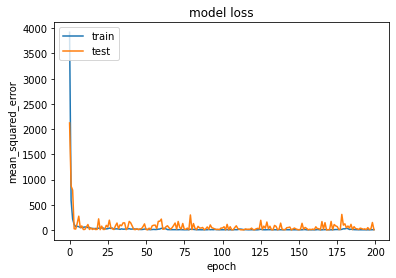

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print("train MSE", min(history.history['loss']))
print("val MSE", min(history.history['val_loss']))

train MSE 3.1041862964630127
val MSE 1.696614384651184


In [37]:
print("train MSE", history.history['loss'][-1])
print("val MSE", history.history['val_loss'][-1])

train MSE 6.776601791381836
val MSE 6.711671829223633


In [38]:
#X = np.concatenate((X_train, X_test), axis=0)
#Y = dataY
plot_generator = TimeseriesGenerator(dataX, dataY, length=win_length, sampling_rate=1, batch_size=96)
X = plot_generator[0][0]
Y = plot_generator[0][1]
print(X.shape)
print(Y.shape)

(92, 4, 9)
(92, 1)


In [39]:
Y_pred = model.predict(X)
Y_pred.shape

(92, 1)

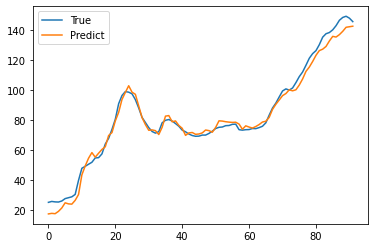

In [40]:
plt.plot(Y, label='True')
plt.plot(Y_pred,  label='Predict')
plt.legend()
plt.show()

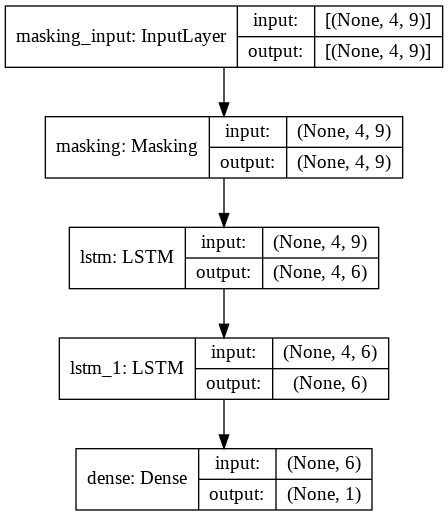

In [ ]:
tf.keras.utils.plot_model(model, to_file='modelfund.png', show_shapes=True)